# Image Classification using Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [4]:
fashion_mnist_df = pd.read_csv('datasets/fashion-mnist_train.csv')

In [5]:
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_mnist_df.shape

(60000, 785)

In [7]:
fashion_mnist_df = fashion_mnist_df.sample(frac=0.3).reset_index(drop=True)

fashion_mnist_df.shape

(18000, 785)

In [8]:
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,8,0,0,0,0,0,0,0,0,0,...,143,146,141,169,76,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,1,...,88,47,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,1,0,0,...,0,0,0,52,174,111,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,45,0,0,0,0,0,0,0,0,0


In [9]:
LOOKUP = {0: 'T-shirt', 
          1: 'Trouser', 
          2: 'Pullover', 
          3: 'Dress', 
          4: 'Coat',
          5: 'Sandal', 
          6: 'Shirt', 
          7: 'Sneaker', 
          8: 'Bag', 
          9: 'Ankle boot'}

In [18]:
def display_image(features, actual_label):
    print("Actual label: ", LOOKUP[actual_label])
    
    plt.imshow(features.reshape(28,28))

In [19]:
X = fashion_mnist_df[fashion_mnist_df.columns[1:]]

Y = fashion_mnist_df['label']

In [20]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,143,146,141,169,76,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,88,47,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,52,174,111,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,45,0,0,0,0,0,0,0,0,0


In [21]:
Y.head()

0    8
1    4
2    5
3    2
4    1
Name: label, dtype: int64

In [22]:
X.loc[5].values[:100]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
         4,   1,   6,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   7,   0,   7, 145, 148,   0], dtype=int64)

In [23]:
Y.loc[5]

8

Actual label:  Bag


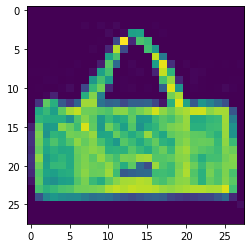

In [24]:
display_image(X.loc[5].values, Y.loc[5])

Actual label:  Coat


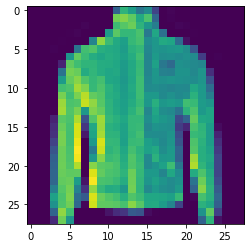

In [25]:
display_image(X.loc[567].values, Y.loc[567])

Actual label:  Ankle boot


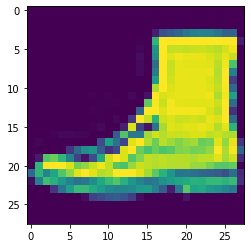

In [26]:
display_image(X.loc[15088].values, Y.loc[15088])

In [28]:
X = X/255.

X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.002199,0.002245,0.002168,0.002599,0.001169,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000015,0.0,...,0.001353,0.000723,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000015,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000800,0.002676,0.001707,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000692,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [30]:
x_train.shape, y_train.shape

((14400, 784), (14400,))

In [31]:
x_test.shape, y_test.shape

((3600, 784), (3600,))

In [32]:
def summarize_classification(y_test,
                             y_pred,
                             avg_method='weighted'):
    
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    
    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print('Test data count: ', len(y_test))
    print('accuracy_count : ' , num_acc)
    print('accuracy_score : ' , acc)
    print('precision_score : ' , prec)
    print('recal_score : ', recall)

In [33]:
logistic_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000).fit(x_train, y_train)

In [34]:
y_pred = logistic_model.predict(x_test)

y_pred

array([9, 3, 9, ..., 7, 7, 0], dtype=int64)

In [35]:
summarize_classification(y_test, y_pred)

Test data count:  3600
accuracy_count :  2348
accuracy_score :  0.6522222222222223
precision_score :  0.6176051253284325
recal_score :  0.6522222222222223


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
